<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/app_for_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def load_image(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_image, num_row, num_col = struct.unpack_from('>iiii', data, 0)
  offset = 16
  image_list = []
  for i in range(num_image):
    image = np.array(struct.unpack_from('>'+str(num_row*num_col)+'B', data, offset)).reshape(num_row,num_col)
    image_list.append(image)
    offset += int(num_row*num_col)
  return image_list

def load_label(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_label = struct.unpack_from('>ii', data, 0)
  offset = 8
  label_list = []
  for i in range(num_label):
    label = struct.unpack_from('>B', data, offset)
    label_list.append(label[0])
    offset += 1
  return label_list

image = load_image('t10k-images.idx3-ubyte')
label = load_label('t10k-labels.idx1-ubyte')

image_train = image[0:8000]
label_train = label[0:8000]
image_test = image[8000:10000]
label_test = label[8000:10000]

In [0]:
class image_with_label():
  def __init__(self, image, label):
    self.image = image
    self.label = label
  def show(self):
    plt.imshow(self.image)
    print("Label: {}".format(self.label))

In [0]:
class k_nearest_neighbors():
  def __init__(self, k=3):
    self.k = k
  def get_template(self, data, label):
    self.template = [image_with_label(data[i],label[i]) for i in range(len(data))]
  def recognize(self, data):
    self.vote_list = [0 for i in range(10)]
    self.distance_of_all = [[sum(np.square(self.template[i].image.flatten() - data.flatten())),i] for i in range(len(self.template))]
    self.class_iterator = 0
    self.sorted_distance = sorted(self.distance_of_all, key=lambda x:x[0])

    for i in range(self.k):
      self.vote_list[self.template[self.sorted_distance[i][1]].label] += 1
    result = self.vote_list.index(max(self.vote_list))
    return result


In [0]:
knn = k_nearest_neighbors()
knn.get_template(image_train, label_train)

In [0]:
knn.recognize(image_test[10])

3

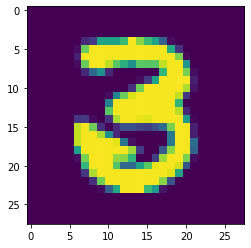

In [0]:
plt.imshow(image_test[10])

In [0]:
error = 0
for i in range(100):
  if knn.recognize(image_test[i]) != label_test[i]: error += 1
error/100

0.03

In [0]:
def ragularize_image(image):
  length = 14
  scale = image.shape[0]/length
  out_image = np.zeros([length, length])

  for i in range(length):
    for j in range(length):
      out_image[i][j] = image[int(i*scale)][int(j*scale)]

  return out_image


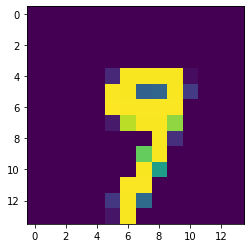

In [12]:
plt.imshow(ragularize_image(image_test[2]))

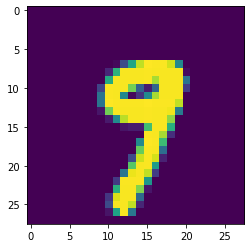

In [11]:
plt.imshow(image_test[2])